<a href="https://colab.research.google.com/github/karthik-1805/DS_Final_Project/blob/main/E_commerce_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
     

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cust_data.xlsx to cust_data.xlsx


In [3]:
df = pd.read_excel("cust_data.xlsx")
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [5]:
df.dtypes.value_counts()

int64     37
object     1
dtype: int64

In [6]:
df.shape

(30000, 38)

In [7]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [8]:
df.describe(include='object')


,Gender
count,27276
unique,2
top,F
freq,22054


In [9]:
def missing(data):
     a = data.isnull().sum().sort_values(ascending=False)
     b =(data.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
     c =pd.concat([a,b],axis=1,keys=["Total","Percentage"])
     return c


In [10]:
missing(df)


,Total,Percentage
Gender,2724,9.08
Cust_ID,0,0.00
LG,0,0.00
Pop Chips,0,0.00
Juniper,0,0.00
Huawei,0,0.00
Compaq,0,0.00
IBM,0,0.00
Burberry,0,0.00
Mi,0,0.00


Text(0.5, 1.0, 'heatmap - missing values')

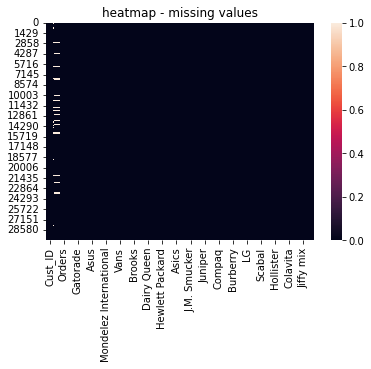

In [11]:
sns.heatmap(df.isnull(),cbar=True)
plt.title('heatmap - missing values')

In [12]:
df['Gender'].unique()

array(['M', 'F', nan], dtype=object)

In [13]:

df['Gender'].value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

In [14]:
df['Gender'].fillna('Other', inplace = True)


In [15]:
df1 = pd.get_dummies(df, drop_first=True)


In [16]:
df1.columns


Index(['Cust_ID', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_M',
       'Gender_Other'],
      dtype='object')

In [17]:
df1.shape


(30000, 39)

In [18]:
df1.isnull().sum()


Cust_ID                   0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix           

In [19]:
data=pd.get_dummies(df,columns=["Gender"])


In [20]:
data.head()


,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Gender_Other
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


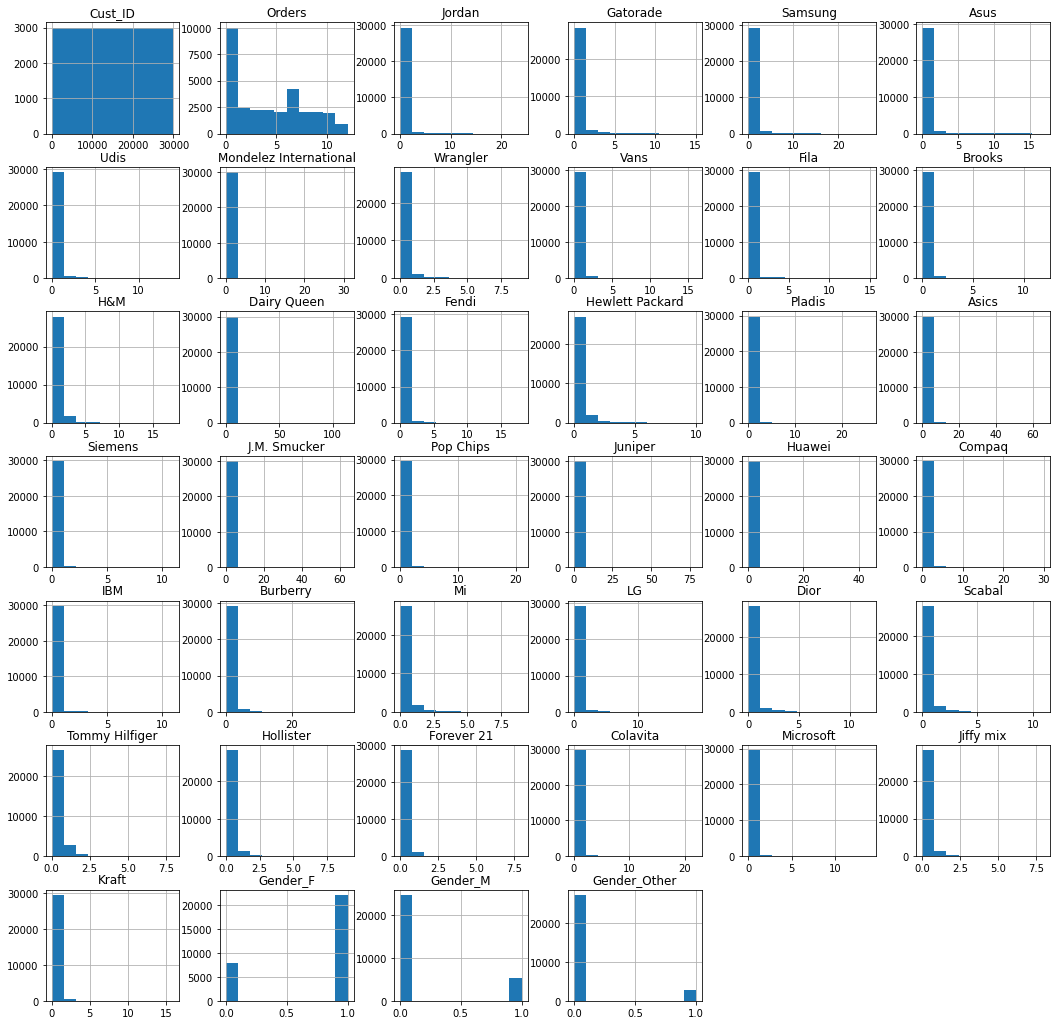

In [21]:
fig=data.hist(figsize=(18,18))


In [22]:
df1.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.25,0.5,0.75,0.95,0.96,0.97,0.98,0.99]).T


,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,95%,96%,97%,98%,99%,max
Cust_ID,30000.0,15000.500000,8660.398374,1.0,300.99,600.98,900.97,1200.96,1500.95,7500.75,15000.5,22500.25,28500.05,28800.04,29100.03,29400.02,29700.01,30000.0
Orders,30000.0,4.169800,3.590311,0.0,0.00,0.00,0.00,0.00,0.00,1.00,4.0,7.00,10.00,10.00,11.00,11.00,12.00,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,2.00,2.00,2.00,3.00,4.00,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,2.00,2.00,2.00,2.00,3.00,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,2.00,2.00,3.00,5.00,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,2.00,2.00,4.00,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,1.00,2.00,3.00,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,1.00,2.00,2.00,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,1.00,2.00,3.00,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,1.00,2.00,2.00,16.0


In [23]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    return x

In [24]:
df2 = df1.apply(lambda x : outlier_capping(x))
df2.shape


(30000, 39)

In [25]:
df2.columns


Index(['Cust_ID', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_M',
       'Gender_Other'],
      dtype='object')

In [26]:
x = ['Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft']
df3 = df2[x]

In [27]:
def Kmeans(data,k, gap, verbose=True, g=True):
    wcs=[]
    clust=[]
    for i in range(1,k+1, gap):
        clust.append(i)
        km=KMeans(n_clusters=i)
        km_result=km.fit(data)
        k1=km_result.inertia_
        wcs.append(k1)
        if verbose:
            print(f"for cluster {i} ; WCSS = {round(k1, 2)}")
    if g:
        plt.plot(clust, wcs, label="within cluster sum of sqaure(wcss)")
        plt.xlabel("Clusters")
        plt.ylabel("Wcss")
        plt.legend()
        plt.show()
    return wcs, clust

for cluster 1 ; WCSS = 2248664324230.07
for cluster 2 ; WCSS = 561841700621.29
for cluster 3 ; WCSS = 249569529262.09
for cluster 4 ; WCSS = 140305839446.37
for cluster 5 ; WCSS = 89755333656.8
for cluster 6 ; WCSS = 62295262861.95
for cluster 7 ; WCSS = 45745345407.08
for cluster 8 ; WCSS = 35007465586.12
for cluster 9 ; WCSS = 27655165633.43
for cluster 10 ; WCSS = 22397178556.79


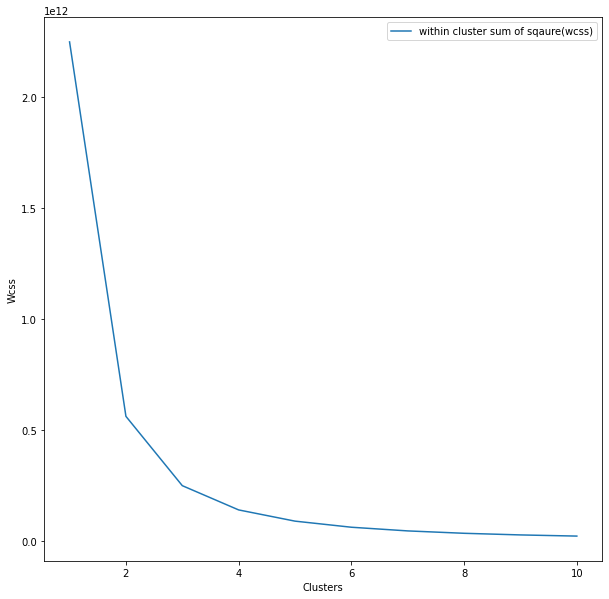

([2248664324230.0723,
  561841700621.2903,
  249569529262.08545,
  140305839446.37466,
  89755333656.79884,
  62295262861.95025,
  45745345407.07746,
  35007465586.1167,
  27655165633.429615,
  22397178556.790627],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [28]:
 plt.figure(figsize = [10,10])
Kmeans(data=df2, k=10, gap=1, verbose=True)

In [29]:
km=KMeans(n_clusters=2)
km_result=km.fit(df2)

In [30]:
km_result.labels_
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Other,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df4=df2.copy()
df4["cluster2"]=km_result.labels_
df4.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_M,Gender_Other,cluster2
0,1.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
1,2.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,3.0,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,1
3,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,5.0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1,1


In [32]:

df4["cluster2"].value_counts()

0    15009
1    14991
Name: cluster2, dtype: int64

In [33]:
d2=df4.groupby(["cluster2"]).mean().T
d2.columns=["cluster_1", "cluster_2"]
d2.reset_index(inplace=True)
d2

,index,cluster_1,cluster_2
0,Cust_ID,22492.992005,7496.000000
1,Orders,4.252315,4.087186
2,Jordan,0.303351,0.202455
3,Gatorade,0.255713,0.217531
4,Samsung,0.241988,0.165032
5,Asus,0.172430,0.113802
6,Udis,0.151509,0.095791
7,Mondelez International,0.137384,0.113268
8,Wrangler,0.114731,0.078714
9,Vans,0.096542,0.079448


In [34]:
overall=pd.DataFrame(df2.describe().T["mean"])
overall.reset_index(inplace=True)
overall.columns=["index", "Overall_mean"]

In [35]:
final=overall.merge(d2, on="index", how="inner")
final

,index,Overall_mean,cluster_1,cluster_2
0,Cust_ID,14998.995100,22492.992005,7496.000000
1,Orders,4.169800,4.252315,4.087186
2,Jordan,0.252933,0.303351,0.202455
3,Gatorade,0.236633,0.255713,0.217531
4,Samsung,0.203533,0.241988,0.165032
5,Asus,0.143133,0.172430,0.113802
6,Udis,0.123667,0.151509,0.095791
7,Mondelez International,0.125333,0.137384,0.113268
8,Wrangler,0.096733,0.114731,0.078714
9,Vans,0.088000,0.096542,0.079448


In [36]:
score1 = metrics.silhouette_score(df2, km_result.labels_)
print('Silhouette Score : % 0.3f' % score1)

Silhouette Score :  0.627


In [37]:
df4.columns


Index(['Cust_ID', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_M',
       'Gender_Other', 'cluster2'],
      dtype='object')

In [38]:
final.to_excel("Cluster_2.xlsx" )


In [39]:
km=KMeans(n_clusters=3)
km_result=km.fit(df2)

In [40]:
km_result.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [41]:
df5=df2.copy()

In [42]:
df5["cluster3"]=km_result.labels_

In [43]:
df5["cluster3"].value_counts()

1    10026
2     9996
0     9978
Name: cluster3, dtype: int64

In [44]:
d3=df5.groupby(["cluster3"]).mean().T
d3.columns=["cluster_1", "cluster_2", "cluster_3"]
d3.reset_index(inplace=True)
d3

,index,cluster_1,cluster_2,cluster_3
0,Cust_ID,4989.500000,24982.997008,14976.500000
1,Orders,4.029164,4.312488,4.167067
2,Jordan,0.197835,0.319569,0.241096
3,Gatorade,0.218581,0.251346,0.239896
4,Samsung,0.152335,0.258628,0.199380
5,Asus,0.103828,0.177638,0.147759
6,Udis,0.087793,0.160782,0.122249
7,Mondelez International,0.097815,0.138939,0.139156
8,Wrangler,0.073562,0.117893,0.098639
9,Vans,0.084386,0.100838,0.078731


In [45]:
final2=overall.merge(d3, on="index", how="inner")
final2

,index,Overall_mean,cluster_1,cluster_2,cluster_3
0,Cust_ID,14998.995100,4989.500000,24982.997008,14976.500000
1,Orders,4.169800,4.029164,4.312488,4.167067
2,Jordan,0.252933,0.197835,0.319569,0.241096
3,Gatorade,0.236633,0.218581,0.251346,0.239896
4,Samsung,0.203533,0.152335,0.258628,0.199380
5,Asus,0.143133,0.103828,0.177638,0.147759
6,Udis,0.123667,0.087793,0.160782,0.122249
7,Mondelez International,0.125333,0.097815,0.138939,0.139156
8,Wrangler,0.096733,0.073562,0.117893,0.098639
9,Vans,0.088000,0.084386,0.100838,0.078731


In [46]:
score2 = metrics.silhouette_score(df2, km_result.labels_)
print('Silhouette Score : % 0.3f' % score2)
     

Silhouette Score :  0.590


In [47]:
final2.to_excel("Cluster_3.xlsx" )

In [48]:
km=KMeans(n_clusters=4)
km_result=km.fit(df2)
     

In [49]:
km_result.labels_

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [50]:
df6=df2.copy()


In [51]:
df6["cluster4"]=km_result.labels_


In [52]:
df6["cluster4"].value_counts()


2    7540
0    7510
1    7485
3    7465
Name: cluster4, dtype: int64

In [53]:
d4=df6.groupby(["cluster4"]).mean().T
d4.columns=["cluster_1", "cluster_2", "cluster_3", "cluster_4"]
d4.reset_index(inplace=True)
d4

,index,cluster_1,cluster_2,cluster_3,cluster_4
0,Cust_ID,18705.500000,11208.000000,26224.512334,3733.000000
1,Orders,4.228362,4.149232,4.280106,4.020094
2,Jordan,0.270173,0.220307,0.335676,0.184729
3,Gatorade,0.264581,0.223514,0.247480,0.210717
4,Samsung,0.214381,0.190648,0.268966,0.139451
5,Asus,0.170972,0.125718,0.174801,0.100603
6,Udis,0.135952,0.110220,0.167109,0.080911
7,Mondelez International,0.128895,0.129325,0.145756,0.097120
8,Wrangler,0.106525,0.091516,0.122281,0.066309
9,Vans,0.091079,0.074950,0.102255,0.083590


In [54]:
final3=overall.merge(d4, on="index", how="inner")
final3

,index,Overall_mean,cluster_1,cluster_2,cluster_3,cluster_4
0,Cust_ID,14998.995100,18705.500000,11208.000000,26224.512334,3733.000000
1,Orders,4.169800,4.228362,4.149232,4.280106,4.020094
2,Jordan,0.252933,0.270173,0.220307,0.335676,0.184729
3,Gatorade,0.236633,0.264581,0.223514,0.247480,0.210717
4,Samsung,0.203533,0.214381,0.190648,0.268966,0.139451
5,Asus,0.143133,0.170972,0.125718,0.174801,0.100603
6,Udis,0.123667,0.135952,0.110220,0.167109,0.080911
7,Mondelez International,0.125333,0.128895,0.129325,0.145756,0.097120
8,Wrangler,0.096733,0.106525,0.091516,0.122281,0.066309
9,Vans,0.088000,0.091079,0.074950,0.102255,0.083590


In [55]:
score3 = metrics.silhouette_score(df2, km_result.labels_)
print('Silhouette Score : % 0.3f' % score3)

Silhouette Score :  0.572


In [56]:
final3.to_excel("Cluster_4.xlsx" )